## Demonstrating lda and pca
## Importing necessary libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from matplotlib import image
import numpy as np
%matplotlib inline
import seaborn as sns; sns.set()
from PIL import Image
import os, sys
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from mpl_toolkits.mplot3d import Axes3D

D:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is 

### Class map. Dict containing values of each class 

In [3]:
class_map = {0:"T-shirt/top",
1:"Trouser/pants",
2:"Pullover shirt",
3:"Dress",
4:"Coat",
5:"Sandal",
6:"Shirt",
7:"Sneaker",
8:"Bag",
9:"Ankle boot"}

## Using fashion mnist dataset
### Has about 60000 train and 10000 test images rangin through 10 classes

In [4]:
mnist = tf.keras.datasets.fashion_mnist

In [5]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

### Use index to see through the dataset (Train) 
Within indices [0:60000]

T-shirt/top


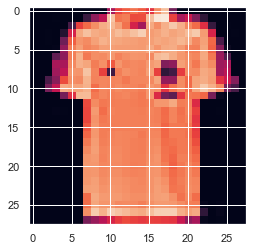

In [6]:
index = 2300
np.set_printoptions(linewidth=200)
plt.imshow(training_images[index])
print(class_map[training_labels[index]])
#print(training_images[index])

## Class distribution of training set. Uniform

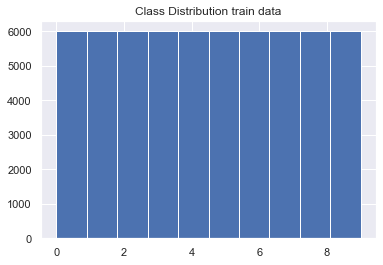

In [6]:
plt.hist(training_labels,bins = 10)
plt.title("Class Distribution train data")
plt.show()

## Class distribution of test set. Also uniform
### Class distirbutions help debuggin classifier issues and having correct assumptions about data

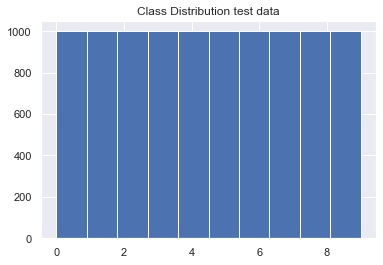

In [7]:
plt.hist(test_labels,bins = 10)
plt.title("Class Distribution test data")
plt.show()

## Normalizing data and converting to float
### tf needs float values

In [8]:
training_images = training_images/255.0
test_images = test_images/255.0

## Applying PCA() on the dataset
### PCA maps the input feature space into another feature space based on eigenvectors. It considers variance of data
### It is unsupervised and helps remove correlated attributes. Denoising can also be done.
### Has disadvantages. Showcased later

### Displaying Correlation between a subset of input feature space

In [9]:
tot = list()
for i in range(0,3):
    for j in range(0,3):
        if i !=j:
            cor = np.corrcoef(training_images.reshape(training_images.shape[0],-1)[:][i],training_images.reshape(training_images.shape[0],-1)[:][j])[0,1]
            print("Correlation : ",i,j,"---",cor)
            tot.append(cor)
            
print("Average correlation: ",sum(tot)/len(tot))

Correlation :  0 1 --- 0.1353670765955539
Correlation :  0 2 --- 0.16735204377956073
Correlation :  1 0 --- 0.13536707659555386
Correlation :  1 2 --- 0.5990603230873573
Correlation :  2 0 --- 0.16735204377956073
Correlation :  2 1 --- 0.5990603230873573
Average correlation:  0.30059314782082397


### Converting to PCA feature space

In [10]:
train_vector = training_images.reshape(training_images.shape[0],-1)
test_vector = test_images.reshape(test_images.shape[0],-1)
pca = PCA(784)
projected = pca.fit_transform(train_vector)
projected_test = pca.fit_transform(test_vector)

### Displaying correlation of pca feature space. 
#### Clearly reduced.

In [11]:
tot = list()
for i in range(0,3):
    for j in range(0,3):
        if i !=j:
            cor = np.corrcoef(projected[:][i],projected[:][j])[0,1]
            print("Correlation : ",i,j,"---",cor)
            tot.append(cor)
            
print("Average correlation: ",sum(tot)/len(tot))

Correlation :  0 1 --- -0.19663072654592254
Correlation :  0 2 --- -0.46938335387138147
Correlation :  1 0 --- -0.19663072654592254
Correlation :  1 2 --- -0.158200412967003
Correlation :  2 0 --- -0.46938335387138147
Correlation :  2 1 --- -0.15820041296700302
Average correlation:  -0.2747381644614357


## Visualizing PCA vs LDA

### PCA feature space in 2D plot
#### Evident that it maintains maximum variance

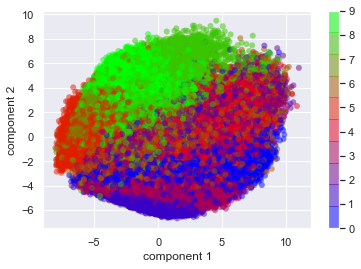

In [12]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=training_labels, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('brg', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

## Converting inpout space to LDA feature space
### It is important to note that LDA is not only a dimensionality reducing technique, rather it is also a classificaton technique. It essentially converts the feature space to find the axis that
1. Reduces the scatter within the class
2. Increases distance/linear seperability between means

In [13]:
lda = LinearDiscriminantAnalysis(n_components=9)
projected_lda = lda.fit(train_vector, training_labels).transform(train_vector)
projected_lda_test = lda.fit(test_vector,test_labels).transform(test_vector)

## 2D plot of LDA feature space. 
### The difference btween PCA and LDA is evident here. LDA plot has more separability

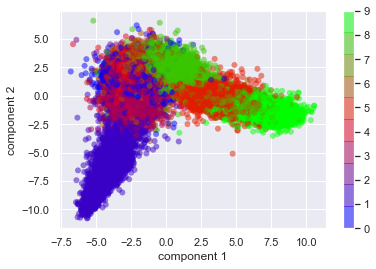

In [14]:
plt.scatter(projected_lda[:, 0], projected_lda[:, 1],
            c=training_labels, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('brg', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

## 3D plot of the LDA feature space to inspect separability further

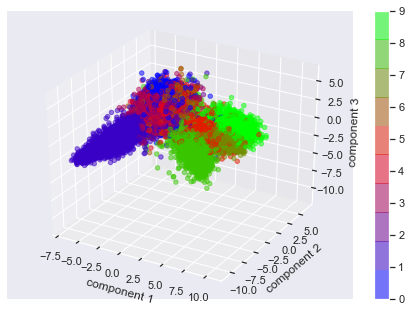

In [15]:
ax = Axes3D(plt.figure())
p = ax.scatter(projected_lda[:, 0], projected_lda[:, 1],projected_lda[:,2],
            c=training_labels, alpha=0.5,
            cmap=plt.cm.get_cmap('brg', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
ax.set_zlabel('component 3')
plt.colorbar(p);

## LDA (As a classifier also) tends to overfit the data as it is a supervised technique.
### It aims to maximise the distance between class means using class labels and this behavior tends to overfit the data if not careful

### Here we choose class 0 (Shirt/top) and separate that class into 3 classes.
There is no difference (Atleast not that much) between the images in class 0.
But we are telling the algorithm that there is.

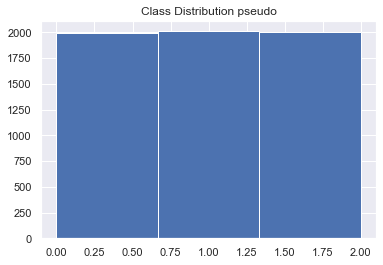

In [16]:
pseudo_target = np.random.randint(3,size = (6000,))
plt.hist(pseudo_target,bins = 3)
plt.title("Class Distribution pseudo")
plt.show()

## Visualizing class 0. 
### It is the same class for us.

[    1     2     4 ... 59974 59985 59998]


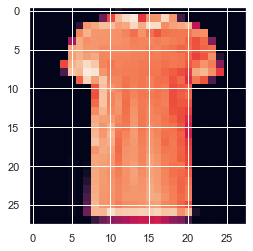

In [18]:
idc = np.where(training_labels == 0)[0]
print(idc)
temp_train = np.array([training_images[i] for i in idc])
plt.imshow(temp_train[4])

## Plotting LDA feature space of constructed  pseudo classes.
### It is clear to see that the model tries to separate classes even when there is no difference 

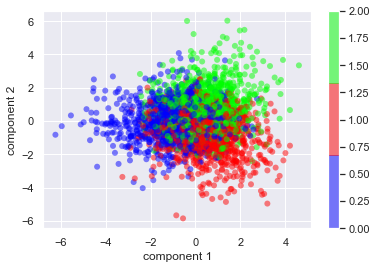

In [19]:
lda = LinearDiscriminantAnalysis(n_components=2)
ps_lda = lda.fit(temp_train.reshape(temp_train.shape[0],-1),pseudo_target).transform(temp_train.reshape(temp_train.shape[0],-1))
plt.scatter(ps_lda[:, 0], ps_lda[:, 1],
            c=pseudo_target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('brg', 3))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

## Exploring how classification fares on different feature spaces


## Network trained on Straight up original input space (Best performing model)
Can be further optimized. But for now, this is good enough

In [112]:
class mycallbc(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,log = {}):
        if log["acc"]>=0.985:
            print("\n\nReached enough accuracy")
            self.model.stop_training = True
callbc = mycallbc()
init_model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                         tf.keras.layers.Dense(units = 1024, activation = tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l2(5e-4)),
                                         tf.keras.layers.Dense(units = 1024, activation = tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l2(5e-4)),
                                         tf.keras.layers.Dense(units = 2048, activation = tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l2(5e-4)),
                                         tf.keras.layers.Dense(units = 2048, activation = tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l2(5e-4)),
                                         tf.keras.layers.Dense(units = 1024, activation = tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l2(5e-4)),
                                        tf.keras.layers.Dense(units = 10,activation = tf.nn.softmax)])
init_model.compile(optimizer = "adam",loss = "sparse_categorical_crossentropy",metrics = ["accuracy"])
init_model.fit(training_images,training_labels,batch_size = 2048,epochs = 80,callbacks = [callbc])

Epoch 1/80
60000/60000 [==============================] - 4s 59us/sample - loss: 3.4979 - acc: 0.6434
Epoch 2/80
60000/60000 [==============================] - 3s 42us/sample - loss: 2.0657 - acc: 0.8375
Epoch 3/80
60000/60000 [==============================] - 3s 42us/sample - loss: 1.6096 - acc: 0.8596
Epoch 4/80
60000/60000 [==============================] - 2s 41us/sample - loss: 1.3111 - acc: 0.8780
Epoch 5/80
60000/60000 [==============================] - 3s 53us/sample - loss: 1.1244 - acc: 0.8804
Epoch 6/80
60000/60000 [==============================] - 3s 42us/sample - loss: 0.9724 - acc: 0.8892
Epoch 7/80
60000/60000 [==============================] - 2s 42us/sample - loss: 0.8718 - acc: 0.8883
Epoch 8/80
60000/60000 [==============================] - 2s 41us/sample - loss: 0.7774 - acc: 0.8944
Epoch 9/80
60000/60000 [==============================] - 2s 41us/sample - loss: 0.7144 - acc: 0.8966
Epoch 10/80
60000/60000 [==============================] - 2s 41us/sample - loss: 

In [113]:
print("Train accuracy:",init_model.evaluate(training_images,training_labels)[1]*100)
print("Test accuracy:",init_model.evaluate(test_images,test_labels)[1]*100)

60000/60000 [==============================] - 9s 142us/sample - loss: 0.2195 - acc: 0.9616
Train accuracy: 96.16000056266785
10000/10000 [==============================] - 1s 140us/sample - loss: 0.4984 - acc: 0.8877
Test accuracy: 88.77000212669373


## Network trained on PCA input space.
The accuracies are really low. Showing that PCA is not a mandatory step in the machine learning pipeline.
Here we have lost valuable information(features) by projecting into PCA feature space. And this stands as a disadvantage of PCA

In [122]:
feat = 512
class mycallbc(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,log = {}):
        if log["acc"]>=0.985:
            print("\n\nReached enough accuracy")
            self.model.stop_training = True
callbc = mycallbc()
pca_model = tf.keras.models.Sequential([tf.keras.layers.Input(shape = [feat]),
                                          tf.keras.layers.Dense(units = 1024, activation = tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l2(1)),
                                         tf.keras.layers.Dense(units = 1024, activation = tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l2(1)),
                                         tf.keras.layers.Dense(units = 1024, activation = tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l2(1)),
                                         tf.keras.layers.Dense(units = 1024, activation = tf.nn.relu),
                                         tf.keras.layers.Dense(units = 1024, activation = tf.nn.relu),
                                        tf.keras.layers.Dense(units = 10,activation = tf.nn.softmax)])
pca_model.compile(optimizer = "adam",loss = "sparse_categorical_crossentropy",metrics = ["accuracy"])
pca_model.fit(projected[:,:feat],training_labels,batch_size = 2048,epochs = 30,callbacks = [callbc])

Epoch 1/30
60000/60000 [==============================] - 2s 36us/sample - loss: 1312.8767 - acc: 0.7000
Epoch 2/30
60000/60000 [==============================] - 2s 29us/sample - loss: 135.5872 - acc: 0.6978
Epoch 3/30
60000/60000 [==============================] - 2s 29us/sample - loss: 7.3672 - acc: 0.6627
Epoch 4/30
60000/60000 [==============================] - 2s 38us/sample - loss: 1.7854 - acc: 0.60821s 
Epoch 5/30
60000/60000 [==============================] - 2s 29us/sample - loss: 1.7285 - acc: 0.6181
Epoch 6/30
60000/60000 [==============================] - 2s 39us/sample - loss: 1.4098 - acc: 0.6471
Epoch 7/30
60000/60000 [==============================] - 2s 30us/sample - loss: 1.2620 - acc: 0.6822
Epoch 8/30
60000/60000 [==============================] - 2s 30us/sample - loss: 1.2166 - acc: 0.69800s - loss: 1.2050 - acc: 0.7
Epoch 9/30
60000/60000 [==============================] - 2s 32us/sample - loss: 1.2603 - acc: 0.6689
Epoch 10/30
60000/60000 [=====================

In [123]:
print("Train accuracy:",pca_model.evaluate(projected[:,:feat],training_labels)[1]*100)
print("Test accuracy:",pca_model.evaluate(projected_test[:,:feat],test_labels)[1]*100)

60000/60000 [==============================] - 5s 90us/sample - loss: 0.9656 - acc: 0.7551
Train accuracy: 75.51166415214539
10000/10000 [==============================] - 1s 81us/sample - loss: 2.9745 - acc: 0.4270
Test accuracy: 42.69999861717224


## Network trained on LDA feature space
Similar to PCA, we seem to have lost a good dea of information. And hence the difference between training and test errors keeep increasing (Overfitting)

In [310]:
feat = 6
lda_model = tf.keras.models.Sequential([tf.keras.layers.Input(shape = [feat]),
                                         tf.keras.layers.Dense(units = 512, activation = tf.nn.relu,
                                                               kernel_regularizer = tf.keras.regularizers.l2(1)),
                                        tf.keras.layers.Dense(units = 10,activation = tf.nn.softmax)])
lda_model.compile(optimizer = "adam",loss = "sparse_categorical_crossentropy",metrics = ["accuracy"])
lda_model.fit(projected_lda[:,:feat],training_labels,batch_size = 512,epochs = 50)

Epoch 1/50
60000/60000 [==============================] - 0s 8us/sample - loss: 4.4935 - acc: 0.6783
Epoch 2/50
60000/60000 [==============================] - 0s 5us/sample - loss: 1.2046 - acc: 0.7578
Epoch 3/50
60000/60000 [==============================] - 0s 5us/sample - loss: 1.0380 - acc: 0.7661
Epoch 4/50
60000/60000 [==============================] - 0s 5us/sample - loss: 0.9558 - acc: 0.7676
Epoch 5/50
60000/60000 [==============================] - 0s 5us/sample - loss: 0.9011 - acc: 0.7710
Epoch 6/50
60000/60000 [==============================] - 0s 5us/sample - loss: 0.8624 - acc: 0.7716
Epoch 7/50
60000/60000 [==============================] - 0s 5us/sample - loss: 0.8324 - acc: 0.7733
Epoch 8/50
60000/60000 [==============================] - 0s 5us/sample - loss: 0.8105 - acc: 0.7741
Epoch 9/50
60000/60000 [==============================] - 0s 5us/sample - loss: 0.7920 - acc: 0.7732
Epoch 10/50
60000/60000 [==============================] - 0s 5us/sample - loss: 0.7780 - a

In [311]:
print("Train accuracy:",lda_model.evaluate(projected_lda[:,:feat],training_labels)[1]*100)
print("Test accuracy:",lda_model.evaluate(projected_lda_test[:,:feat],test_labels)[1]*100)

60000/60000 [==============================] - 3s 50us/sample - loss: 0.6410 - acc: 0.7758
Train accuracy: 77.57999897003174
10000/10000 [==============================] - 0s 49us/sample - loss: 0.6113 - acc: 0.7654
Test accuracy: 76.53999924659729


## Using LDA feature space of PCA feature space to train network
### Applying PCA to LDA first acts as a regualarizer to LDA and gives better performance than either one. (In this case)
Definitely not arguing that PCA on LDA is a good regularization method. But merely stating observations. Because vanilla regularization (l1,l2,dropout) is much more efficient

In [314]:
lda = LinearDiscriminantAnalysis(n_components=9)
pca_lda = lda.fit(projected,training_labels).transform(projected)
pca_lda_test = lda.fit(projected_test,test_labels).transform(projected_test)

In [328]:
feat = 6
lda_pca_model = tf.keras.models.Sequential([tf.keras.layers.Input(shape = [feat]),
                                         tf.keras.layers.Dense(units = 512, activation = tf.nn.relu,
                                                               kernel_regularizer = tf.keras.regularizers.l2(0.001)),
                                        tf.keras.layers.Dense(units = 10,activation = tf.nn.softmax)])
lda_pca_model.compile(optimizer = "adam",loss = "sparse_categorical_crossentropy",metrics = ["accuracy"])
lda_pca_model.fit(pca_lda[:,:feat],training_labels,batch_size = 1024,epochs = 50)

Epoch 1/50
60000/60000 [==============================] - 0s 7us/sample - loss: 0.9974 - acc: 0.6878
Epoch 2/50
60000/60000 [==============================] - 0s 3us/sample - loss: 0.6347 - acc: 0.7713
Epoch 3/50
60000/60000 [==============================] - 0s 3us/sample - loss: 0.6064 - acc: 0.7804
Epoch 4/50
60000/60000 [==============================] - 0s 4us/sample - loss: 0.5894 - acc: 0.7861
Epoch 5/50
60000/60000 [==============================] - 0s 3us/sample - loss: 0.5781 - acc: 0.7904
Epoch 6/50
60000/60000 [==============================] - 0s 3us/sample - loss: 0.5701 - acc: 0.7936
Epoch 7/50
60000/60000 [==============================] - 0s 3us/sample - loss: 0.5645 - acc: 0.7939
Epoch 8/50
60000/60000 [==============================] - 0s 3us/sample - loss: 0.5599 - acc: 0.7952
Epoch 9/50
60000/60000 [==============================] - 0s 3us/sample - loss: 0.5563 - acc: 0.7967
Epoch 10/50
60000/60000 [==============================] - 0s 3us/sample - loss: 0.5535 - a

In [329]:
print("Train accuracy:",lda_pca_model.evaluate(pca_lda[:,:feat],training_labels)[1]*100)
print("Test accuracy:",lda_pca_model.evaluate(pca_lda_test[:,:feat],test_labels)[1]*100)

60000/60000 [==============================] - 4s 59us/sample - loss: 0.5184 - acc: 0.8063
Train accuracy: 80.62833547592163
10000/10000 [==============================] - 1s 53us/sample - loss: 0.5304 - acc: 0.7869
Test accuracy: 78.6899983882904


<center><h1>End of notebook</h1></center>